In [1]:
import csv
import os
import json
import codecs
import re
import pandas as pd

In [2]:
import xlrd

In [3]:
eng_data = pd.read_excel('other.xlsx')

In [4]:
eng_data.dropna(inplace=True)

In [5]:
len(eng_data)

1150

In [6]:
data = list(eng_data['text'])

In [7]:
data

['What are the risk factors for the presence of #dengue  vector mosquitoes? Determinants of their prevalence and larval site selection in  Dhaka ,  ',
 'Emergency (O-)  Blood  Needed for  Dengue  patient.\nPlace: Insaf Barakah Hospital, Moghbazar\nContact: 01911831932 — looking for O-  blood  donors in  Dhaka   https://www. facebook.com/10000024204126 6/posts/2282699395081440/ \xa0 …',
 'The threat of #denguefever  looms over as the monsoon progresses, hitting  Bangladesh  with higher levels of rainfall. Over 80% of mosquitoes hatching eggs in motionless water in Dhaka city could be #dengue -spreading #AedesAegypti ,  ',
 'Low socio-economic zones of  Dhaka  may have higher presence of #AedesAegypti  mosquitoes: New insights,  ',
 'Recent findings on risk factors for the presence of #dengue  vector mosquitoes in  Dhaka ,  ',
 '# IEDCR  reports 680 #dengue  cases so far  ',
 'New report on circulating #dengue  virus serotypes in  Bangladesh  from 2013 to 2016,  ',
 "Bangladesh 's climat

In [8]:
import numpy as np
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [9]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [10]:
new_data = []

for i in range (len(data)):
    clean_tweet = re.match('(.*?)http.*?\s?(.*?)', data[i])
    if clean_tweet:
        new_tweet = ''+clean_tweet.group(1) + clean_tweet.group(2)
        
        new_data.append(new_tweet)
    else:
        new_data.append(data[i])

data = new_data

In [11]:
data = [data[i].replace('#','') for i in range(len(data))]

In [12]:
eng_data['text'] = data

In [13]:
eng_data

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,medias,is_reply,is_retweet,user_id
0,icddr_b,7.565394e+08,What are the risk factors for the presence of ...,/icddr_b/status/1013393046006915072,2.0,3.0,0.0,2018-07-01 05:05:04,False,false,False,False,4.550359e+08
1,Partho_Sahid,2.119500e+09,Emergency (O-) Blood Needed for Dengue pat...,/Partho_Sahid/status/1015170850297806848,0.0,0.0,0.0,2018-07-06 02:49:26,False,false,False,False,1.442974e+09
2,icddr_b,5.676073e+08,The threat of denguefever looms over as the m...,/icddr_b/status/1017081477832441856,4.0,7.0,0.0,2018-07-11 09:21:35,False,false,False,False,4.550359e+08
3,icddr_b,8.955904e+07,Low socio-economic zones of Dhaka may have h...,/icddr_b/status/1017467397345808385,0.0,0.0,0.0,2018-07-12 10:55:05,False,false,False,False,4.550359e+08
4,icddr_b,-1.701351e+09,Recent findings on risk factors for the presen...,/icddr_b/status/1018971072195162112,2.0,8.0,0.0,2018-07-16 14:30:09,False,false,False,False,4.550359e+08
5,urumurum,9.790259e+07,IEDCR reports 680 dengue cases so far,/urumurum/status/1020184775917690881,0.0,0.0,0.0,2018-07-19 22:52:59,True,https://t.co/ZW7iPETwhg,False,False,3.062748e+07
6,icddr_b,-8.667996e+08,New report on circulating dengue virus seroty...,/icddr_b/status/1021507792383881217,0.0,2.0,0.0,2018-07-23 14:30:11,False,false,False,False,4.550359e+08
7,icddr_b,8.948777e+08,Bangladesh 's climatic conditions may facilita...,/icddr_b/status/1022821470022582273,1.0,1.0,0.0,2018-07-27 05:30:16,False,false,False,False,4.550359e+08
8,NewAgeBDcom,-6.577357e+07,Aedes larvae found at one in three houses in ...,/NewAgeBDcom/status/1023113887615311872,0.0,1.0,0.0,2018-07-28 00:52:14,False,false,False,False,9.386876e+08
9,GoraLorca,3.746652e+08,Wow! Aedes larvae found at one in three house...,/GoraLorca/status/1023161467703455744,0.0,0.0,0.0,2018-07-28 04:01:17,True,https://t.co/LAzyooTid1,False,False,1.240975e+09


In [14]:
eng_data['datetime'] = pd.to_datetime(eng_data['datetime'])

eng_data = eng_data.sort_values('datetime')

In [15]:
eng_data.drop(eng_data.columns[0],axis=1,inplace=True)

In [16]:
eng_data.index = list(np.arange(len(eng_data)))

In [17]:
eng_data

,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,has_media,medias,is_reply,is_retweet,user_id
0,-1.807863e+09,DENGUEFEVER AWARENESS - `Dengue may break o...,/DOAWAYWDENGUE/status/19666973140,0.0,0.0,0.0,2010-07-27 08:54:07,False,false,False,False,3.354970e+07
1,5.747630e+08,Bangladesh : 473 dengue cases in Dhaka,/Crof/status/102929918320586753,0.0,0.0,0.0,2011-08-14 19:29:39,False,false,False,False,1.904299e+07
2,-2.682962e+08,Dengue News: Eradicating dengue menace - Fin...,/DengueNews/status/110057252496482304,0.0,0.0,0.0,2011-09-03 11:31:08,False,false,False,False,3.640113e+08
3,-7.115981e+07,"Urgent O- ( O Negative) Blood Needed \n""O-"" ...",/Mazedul/status/137597059736940544,0.0,0.0,0.0,2011-11-18 10:24:30,False,false,False,False,3.761954e+07
4,1.484927e+09,Dengue News: Dengue-like fever returns stron...,/DengueNews/status/139426347993935872,0.0,0.0,0.0,2011-11-23 11:33:26,False,false,False,False,3.640113e+08
5,-1.891484e+09,Dengue News: Hydroclimatological variability...,/DengueNews/status/194786278334676993,0.0,0.0,0.0,2012-04-24 06:54:02,False,false,False,False,3.640113e+08
6,-1.048445e+09,"Ah, the smell of Dhaka 's open sewerage in th...",/OnlyinDhaka/status/268289421768523776,0.0,0.0,0.0,2012-11-13 01:49:17,False,false,False,False,9.075084e+08
7,1.170362e+09,"O+ Blood Needed, Loc- Lab-Aid Hospital, Dhan...",/selimbd08/status/271294269006958592,0.0,0.0,0.0,2012-11-21 08:49:28,False,false,False,False,3.521479e+08
8,5.496136e+08,« Notre recherche permettra d’établir des donn...,/IDRC_CRDI/status/291987055746117632,0.0,0.0,0.0,2013-01-17 11:15:13,False,false,False,False,4.006517e+07
9,5.579776e+08,« Que savons-nous de la dengue à Dhaka ? Tr...,/IDRC_CRDI/status/292023550091595776,1.0,0.0,0.0,2013-01-17 13:40:14,False,false,False,False,4.006517e+07


In [18]:
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['What are the risk factors for the presence of dengue vector mosquitoes? '
 'Determinants of their prevalence and larval site selection in Dhaka , ']


In [19]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])


[['what', 'are', 'the', 'risk', 'factors', 'for', 'the', 'presence', 'of', 'dengue', 'vector', 'mosquitoes', 'determinants', 'of', 'their', 'prevalence', 'and', 'larval', 'site', 'selection', 'in', 'dhaka']]


In [20]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['what', 'are', 'the', 'risk', 'factors', 'for', 'the', 'presence', 'of', 'dengue', 'vector', 'mosquitoes', 'determinants', 'of', 'their', 'prevalence', 'and', 'larval', 'site', 'selection', 'in', 'dhaka']


In [21]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [22]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['risk', 'factor', 'presence', 'dengue', 'vector', 'mosquitoe', 'determinant', 'prevalence', 'larval', 'site', 'selection', 'dhaka']]


In [23]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]


In [24]:
id2word[0]

'dengue'

In [25]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('dengue', 1),
  ('determinant', 1),
  ('dhaka', 1),
  ('factor', 1),
  ('larval', 1),
  ('mosquitoe', 1),
  ('presence', 1),
  ('prevalence', 1),
  ('risk', 1),
  ('selection', 1),
  ('site', 1),
  ('vector', 1)]]

In [26]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [27]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.163*"aede" + 0.105*"find" + 0.043*"net" + 0.035*"south" + 0.026*"surge" + '
  '0.023*"larvae" + 0.022*"house" + 0.019*"almost" + 0.012*"north" + '
  '0.002*"newagebd"'),
 (1,
  '0.230*"country" + 0.123*"mosquito_borne" + 0.036*"cause" + 0.036*"severe" + '
  '0.018*"rainy" + 0.015*"flu" + 0.010*"decade" + 0.006*"disease" + '
  '0.003*"grow" + 0.002*"occur"'),
 (2,
  '0.060*"due" + 0.051*"struggle" + 0.049*"low" + 0.036*"climatechange" + '
  '0.035*"count" + 0.031*"kill" + 0.030*"ab" + 0.026*"urgently" + '
  '0.011*"september" + 0.008*"brother"'),
 (3,
  '0.208*"chikungunya" + 0.086*"control" + 0.078*"last" + 0.073*"rise" + '
  '0.054*"fight" + 0.043*"government" + 0.041*"see" + 0.017*"compare" + '
  '0.014*"treat" + 0.009*"dhakatribune"'),
 (4,
  '0.147*"death" + 0.072*"denguefever" + 0.068*"hit" + 0.029*"make" + '
  '0.022*"frontpage" + 0.013*"php" + 0.009*"stor" + 0.009*"y_fbid" + '
  '0.008*"let" + 0.000*"die"'),
 (5,
  '0.159*"need" + 0.054*"suffer" + 0.044*"old" + 0.027*"

In [28]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -14.946153349636013

Coherence Score:  0.43745585264271797


In [29]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\onyho\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.529091  0.071216       1        1  53.569729
18     0.077841 -0.335279       2        1   6.142377
6      0.017124  0.058019       3        1   5.354941
15     0.036441 -0.031557       4        1   4.908740
9     -0.010957 -0.085929       5        1   3.983161
14    -0.017509  0.034503       6        1   3.863216
3     -0.007296  0.038888       7        1   3.189545
16    -0.020109  0.008902       8        1   3.180709
13    -0.025089  0.032292       9        1   3.103770
1     -0.034935  0.027804      10        1   2.186768
19    -0.036608  0.026660      11        1   1.891853
0     -0.046258  0.023194      12        1   1.570993
4     -0.051920  0.017745      13        1   1.331367
2     -0.054794  0.019406      14        1   1.187783
12    -0.052957  0.020375      15        1   1.180595
5     -0.055584  0.018678      16        1   1.121640
8     -0.058311  0.016827      17        1   0.854233
17    -0.061703  0.013976      18        1   0.649710
10    -0.061438  0.015346      19        1   0.606903
11    -0.065030  0.008935      20        1   0.121979, topic_info=     Category        Freq             Term        Total  loglift  logprob
term                                                                     
0     Default  2693.00000           dengue  2693.000000  30.0000   30.000
29    Default  1393.00000       bangladesh  1393.000000  29.0000   29.000
135   Default   190.00000         mosquito   190.000000  28.0000   28.000
55    Default   205.00000             case   205.000000  27.0000   27.000
19    Default   209.00000         hospital   209.000000  26.0000   26.000
24    Default   184.00000          patient   184.000000  25.0000   25.000
84    Default   126.00000           people   126.000000  24.0000   24.000
81    Default   112.00000      chikungunya   112.000000  23.0000   23.000
5     Default   101.00000        mosquitoe   101.000000  22.0000   22.000
343   Default    84.00000          country    84.000000  21.0000   21.000
2     Default   648.00000            dhaka   648.000000  20.0000   20.000
58    Default    86.00000           report    86.000000  19.0000   19.000
73    Default    58.00000             http    58.000000  18.0000   18.000
15    Default   461.00000              com   461.000000  17.0000   17.000
30    Default    75.00000             city    75.000000  16.0000   16.000
8     Default    72.00000             risk    72.000000  15.0000   15.000
96    Default    71.00000            blood    71.000000  14.0000   14.000
86    Default   236.00000             year   236.000000  13.0000   13.000
278   Default    63.00000         epidemic    63.000000  12.0000   12.000
186   Default   394.00000           health   394.000000  11.0000   11.000
69    Default    43.00000             aede    43.000000  10.0000   10.000
349   Default    45.00000   mosquito_borne    45.000000   9.0000    9.000
103   Default   355.00000            fever   355.000000   8.0000    8.000
188   Default   351.00000             news   351.000000   7.0000    7.000
182   Default    46.00000          control    46.000000   6.0000    6.000
20    Default   347.00000            https   347.000000   5.0000    5.000
82    Default    46.00000          capital    46.000000   4.0000    4.000
83    Default    33.00000            death    33.000000   3.0000    3.000
80    Default   326.00000            twitt   326.000000   2.0000    2.000
144   Default    36.00000         increase    36.000000   1.0000    1.000
...       ...         ...              ...          ...      ...      ...
1650  Topic20     0.00573            index     0.995692   1.5514   -8.177
1649  Topic20     0.00573           fbcnni     0.995685   1.5514   -8.177
1656  Topic20     0.00573            state     0.995692   1.5514   -8.177
1655  Topic20     0.00573            scary     0.995690   1.5514   -8.177
1654  Topic20     0.00573      

In [30]:
import os

In [31]:
os.environ['MALLET_HOME'] = 'C:\\mallet'

mallet_path = 'C:\\mallet\\bin\\mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [32]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(12,
  [('dhaka', 0.097911227154047),
   ('aede', 0.06266318537859007),
   ('city', 0.0587467362924282),
   ('day', 0.04046997389033943),
   ('official', 0.03655352480417755),
   ('chikungunya', 0.03524804177545692),
   ('denguefever', 0.02741514360313316),
   ('city_corporation', 0.02741514360313316),
   ('south', 0.02741514360313316),
   ('mayor', 0.020887728459530026)]),
 (10,
  [('outbreak', 0.2213209733487833),
   ('bangladesh', 0.19235225955967555),
   ('bad', 0.06720741599073002),
   ('record', 0.06141367323290846),
   ('struggle', 0.027809965237543453),
   ('https', 0.023174971031286212),
   ('article', 0.0220162224797219),
   ('worst_ever', 0.019698725376593278),
   ('hit', 0.019698725376593278),
   ('dead', 0.013904982618771726)]),
 (3,
  [('dengue', 0.2849462365591398),
   ('health', 0.11827956989247312),
   ('healthcare', 0.03763440860215054),
   ('bit_ly', 0.025537634408602152),
   ('issue', 0.020161290322580645),
   ('vaccine', 0.01747311827956989),
   ('safe', 0.0174731

In [33]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(6,
  [('mosquito', 0.20244565217391305),
   ('control', 0.06521739130434782),
   ('fight', 0.03804347826086957),
   ('minister', 0.03804347826086957),
   ('denguefever', 0.03125),
   ('technique', 0.020380434782608696),
   ('malaria', 0.019021739130434784),
   ('study', 0.019021739130434784),
   ('stop', 0.017663043478260868),
   ('net', 0.017663043478260868)]),
 (5,
  [('bangladesh', 0.2810810810810811),
   ('dengue', 0.1864864864864865),
   ('patient', 0.08243243243243244),
   ('hospitalise', 0.04054054054054054),
   ('admit', 0.03783783783783784),
   ('government', 0.033783783783783786),
   ('total', 0.024324324324324326),
   ('since_january', 0.014864864864864866),
   ('medium', 0.014864864864864866),
   ('scared_deadly', 0.00945945945945946)]),
 (1,
  [('dhaka', 0.22191011235955055),
   ('year', 0.16432584269662923),
   ('bangladesh', 0.13342696629213482),
   ('deadly', 0.03651685393258427),
   ('capital', 0.028089887640449437),
   ('life', 0.021067415730337078),
   ('season', 0

In [34]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [35]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

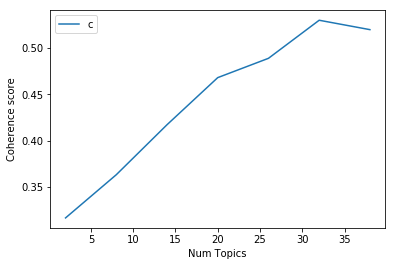

In [36]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [37]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3166
Num Topics = 8  has Coherence Value of 0.3632
Num Topics = 14  has Coherence Value of 0.4172
Num Topics = 20  has Coherence Value of 0.4681
Num Topics = 26  has Coherence Value of 0.4889
Num Topics = 32  has Coherence Value of 0.53
Num Topics = 38  has Coherence Value of 0.5199


In [38]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.250*"twitt" + 0.234*"pic" + 0.039*"awareness" + 0.022*"continue" + '
  '0.018*"support" + 0.016*"clean" + 0.016*"service" + 0.015*"malaria" + '
  '0.013*"volunteer" + 0.012*"raise"'),
 (1,
  '0.242*"dhaka" + 0.085*"mosquitoe" + 0.063*"city" + 0.038*"chikungunya" + '
  '0.029*"risk" + 0.022*"research" + 0.013*"rain" + 0.013*"burden" + '
  '0.011*"level" + 0.011*"water"'),
 (2,
  '0.185*"dhaka" + 0.062*"blood" + 0.041*"contact" + 0.027*"suffer" + '
  '0.026*"south" + 0.026*"blood_needed" + 0.024*"bag" + 0.024*"urgent" + '
  '0.019*"platelet" + 0.018*"facebook"'),
 (3,
  '0.254*"fever" + 0.166*"health" + 0.083*"www" + 0.032*"department" + '
  '0.027*"pic" + 0.025*"confirm" + 0.017*"twitter" + 0.014*"majority" + '
  '0.013*"confirmed_html" + 0.013*"call"'),
 (4,
  '0.133*"disease" + 0.105*"dengue" + 0.071*"spread" + 0.063*"mosquito_borne" '
  '+ 0.037*"infection" + 0.026*"district" + 0.025*"virus" + 0.022*"world" + '
  '0.020*"viral" + 0.017*"protect"'),
 (5,
  '0.247*"dengue" + 

In [39]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.1299,"dhaka, mosquitoe, city, chikungunya, risk, res...",What are the risk factors for the presence of ...
1,1,2.0,0.1423,"dhaka, blood, contact, suffer, south, blood_ne...",Emergency (O-) Blood Needed for Dengue patient...
2,2,1.0,0.1262,"dhaka, mosquitoe, city, chikungunya, risk, res...",The threat of denguefever looms over as the mo...
3,3,1.0,0.0861,"dhaka, mosquitoe, city, chikungunya, risk, res...",Low socio-economic zones of Dhaka may have hig...
4,4,1.0,0.1026,"dhaka, mosquitoe, city, chikungunya, risk, res...",Recent findings on risk factors for the presen...
5,5,17.0,0.0833,"case, year, report, death, deadly, high, recor...",IEDCR reports 680 dengue cases so far
6,6,4.0,0.0625,"disease, dengue, spread, mosquito_borne, infec...",New report on circulating dengue virus serotyp...
7,7,4.0,0.1032,"disease, dengue, spread, mosquito_borne, infec...",Bangladesh s climatic conditions may facilitat...
8,8,12.0,0.1377,"mosquito, aede, control, fight, city_corporati...",Aedes larvae found at one in three houses in D...
9,9,12.0,0.1063,"mosquito, aede, control, fight, city_corporati...",Wow! Aedes larvae found at one in three houses...


In [40]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2080,"twitt, pic, awareness, continue, support, clea...",The rapid spread of the dengue in Bangladesh t...
1,1.0,0.1870,"dhaka, mosquitoe, city, chikungunya, risk, res...",AmdavadAMC there is a new construction site ( ...
2,2.0,0.2346,"dhaka, blood, contact, suffer, south, blood_ne...",Urgent Ab+ blood needed for a dengue patient b...
3,3.0,0.2410,"fever, health, www, department, pic, confirm, ...",LowTGimenez Curse: Florida Department of Heal...
4,4.0,0.1703,"disease, dengue, spread, mosquito_borne, infec...","How Dengue, a deadly mosquito-borne disease, i..."
